In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from sklearn.ensemble import RandomForestRegressor

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from data_cleaning.data_cleaner import DataCleaner


In [12]:
# Current working directory
current_directory = os.getcwd()

# Go up one directory to the root
root = os.path.abspath(os.path.join(current_directory, ".."))

# Get the path to the data
data_path = os.path.join(root, 'clean-data/processed_Sea_level_1_data.csv')

dc: DataCleaner = DataCleaner(data_path)
dc.preview(10)


,Year,Country,Avg Temperature (°C),Sea Level Rise (mm),Rainfall (mm)
0,2000,Argentina,16.900000,4.000000,2047.000000
1,2000,Australia,11.933333,2.266667,2033.333333
2,2000,Brazil,31.200000,3.700000,803.000000
3,2000,Canada,19.300000,2.650000,1383.000000
4,2000,China,26.200000,2.200000,1849.000000
5,2000,France,16.600000,2.800000,1819.666667
6,2000,Germany,9.750000,1.450000,2641.000000
7,2000,India,21.250000,3.250000,1124.500000
8,2000,Indonesia,23.585714,3.242857,1781.428571
9,2000,Mexico,16.900000,1.200000,1974.500000


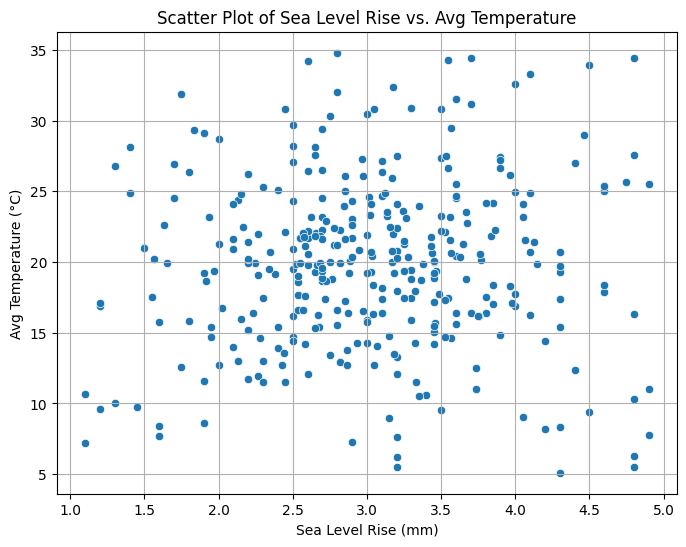

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dc.df["Sea Level Rise (mm)"], y=dc.df["Avg Temperature (°C)"])
plt.xlabel("Sea Level Rise (mm)")
plt.ylabel("Avg Temperature (°C)")
plt.title("Scatter Plot of Sea Level Rise vs. Avg Temperature")
plt.grid(True)
plt.show()

In [14]:
X_features = dc.df[["Year", "Sea Level Rise (mm)", "Rainfall (mm)"]].values
Y_temp = dc.df["Avg Temperature (°C)"].values

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
model.fit(X_features, Y_temp)

RandomForestRegressor(random_state=42)

In [20]:
Y_pred = model.predict(X_features)

print(f"Y Predictions:\n{Y_pred[:10]}")
print(f"Y Temperature:\n{Y_temp[:10]}")

Y Predictions:
[19.46033571 13.87667619 26.92275    18.84651667 23.16108095 18.92682857
 13.55864286 22.08827381 21.68945238 15.74366667]
Y Temperature:
[16.9        11.93333333 31.2        19.3        26.2        16.6
  9.75       21.25       23.58571429 16.9       ]


In [21]:
r2_score = model.score(X_features, Y_temp)
print(f"R² Score: {r2_score:.3f}")

R² Score: 0.835


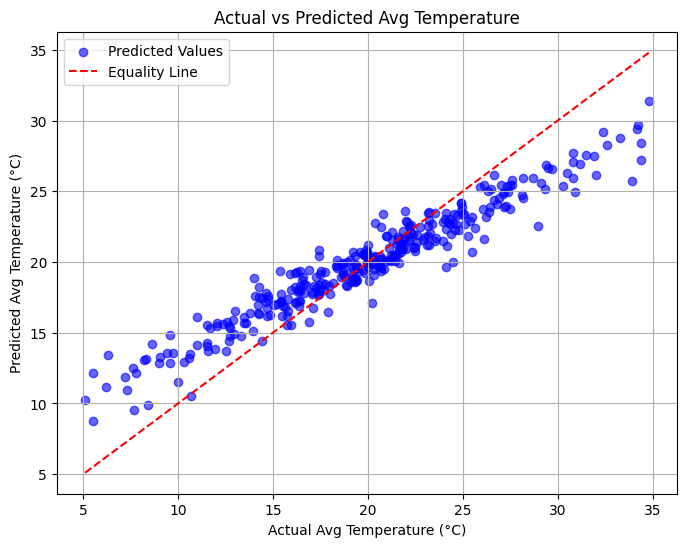

In [ ]:
# Make predictions using the trained model
Y_pred = model.predict(X_features)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))

# Scatter plot of Actual vs Predicted
plt.scatter(Y_temp, Y_pred, label='Predicted Values', color='blue', alpha=0.6)

# Plot the line of equality (perfect prediction)
plt.plot([min(Y_temp), max(Y_temp)], [min(Y_temp), max(Y_temp)], color='red', linestyle='--', label='Equality Line')

# Labels and title
plt.xlabel('Actual Avg Temperature (°C)')
plt.ylabel('Predicted Avg Temperature (°C)')
plt.title('Actual vs Predicted Avg Temperature')

# Grid and legend
plt.grid(True)
plt.legend()

#plt.savefig("rand_forest_reg_temp_trend.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()